<a href="https://colab.research.google.com/github/wongtszkin/COMP3015/blob/main/4_Original_training_with_new_pth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MMDetection Tutorial

Welcome to MMDetection! This is the official colab tutorial for using MMDetection. In this tutorial, you will learn
- Perform inference with a MMDet detector.
- Train a new detector with a new dataset.

Let's start!


## Install MMDetection

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Check nvcc version
!nvcc -V
# Check GCC version
!gcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [3]:
# install dependencies: (use cu101 because colab has CUDA 10.1)
!pip install -U torch==1.5.1+cu101 torchvision==0.6.1+cu101 -f https://download.pytorch.org/whl/torch_stable.html

# install mmcv-full thus we could use CUDA operators
!pip install mmcv-full

%cd /content/drive/MyDrive/
# Install mmdetection
!rm -rf mmdetection
!git clone https://github.com/open-mmlab/mmdetection.git
%cd mmdetection

!pip install -e .

# install Pillow 7.0.0 back in order to avoid bug in colab
!pip install Pillow==7.0.0

Looking in links: https://download.pytorch.org/whl/torch_stable.html
Requirement already up-to-date: torch==1.5.1+cu101 in /usr/local/lib/python3.7/dist-packages (1.5.1+cu101)
Requirement already up-to-date: torchvision==0.6.1+cu101 in /usr/local/lib/python3.7/dist-packages (0.6.1+cu101)
/content/drive/MyDrive
Cloning into 'mmdetection'...
remote: Enumerating objects: 18522, done.
remote: Counting objects: 100% (70/70), done.
remote: Compressing objects: 100% (61/61), done.
remote: Total 18522 (delta 24), reused 29 (delta 9), pack-reused 18452
Receiving objects: 100% (18522/18522), 21.60 MiB | 8.34 MiB/s, done.
Resolving deltas: 100% (12918/12918), done.
Checking out files: 100% (1115/1115), done.
/content/drive/MyDrive/mmdetection
Obtaining file:///content/drive/My%20Drive/mmdetection
  Found existing installation: mmdet 2.13.0
    Can't uninstall 'mmdet'. No files were found to uninstall.
  Running setup.py develop for mmdet


In [4]:
# Check Pytorch installation
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

# Check MMDetection installation
import mmdet
print(mmdet.__version__)

# Check mmcv installation
from mmcv.ops import get_compiling_cuda_version, get_compiler_version
print(get_compiling_cuda_version())
print(get_compiler_version())

1.5.1+cu101 True
2.13.0
11.0
GCC 7.5


## Perform inference with a MMDet detector
MMDetection already provides high level APIs to do inference and training.

In [5]:
!mkdir checkpoints
!gdown "https://drive.google.com/u/0/uc?id=1-QieHkR1Q7CXuBu4fp3rYrvDG9j26eFT"
!wget -c https://open-mmlab.s3.ap-northeast-2.amazonaws.com/mmdetection/v2.0/mask_rcnn/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth \
      -O checkpoints/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth

Downloading...
From: https://drive.google.com/u/0/uc?id=1-QieHkR1Q7CXuBu4fp3rYrvDG9j26eFT
To: /content/drive/My Drive/mmdetection/epoch_36.pth
664MB [00:06, 102MB/s]
--2021-06-21 09:17:44--  https://open-mmlab.s3.ap-northeast-2.amazonaws.com/mmdetection/v2.0/mask_rcnn/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth
Resolving open-mmlab.s3.ap-northeast-2.amazonaws.com (open-mmlab.s3.ap-northeast-2.amazonaws.com)... 52.219.56.75
Connecting to open-mmlab.s3.ap-northeast-2.amazonaws.com (open-mmlab.s3.ap-northeast-2.amazonaws.com)|52.219.56.75|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 177867103 (170M) [application/x-www-form-urlencoded]
Saving to: ‘checkpoints/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth’

checkpoints/mask_rc 100%[===================>] 169.63M  42.4MB/s    in 4.6s    

2021-06-21 09:1

In [6]:
from mmdet.apis import inference_detector, init_detector, show_result_pyplot

# Choose to use a config and initialize the detector

# config = 'configs/mask_rcnn/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco.py'
config = 'configs/mask_rcnn/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco.py'
# Setup a checkpoint file to load
checkpoint = '/content/drive/MyDrive/mmdetection/epoch_36.pth'
# initialize the detector
model = init_detector(config, checkpoint, device='cuda:0')

Use load_from_local loader
The model and loaded state dict do not match exactly

size mismatch for backbone.conv1.weight: copying a param with shape torch.Size([64, 3, 3, 3]) from checkpoint, the shape in current model is torch.Size([64, 3, 7, 7]).
unexpected key in source state_dict: bbox_head.0.fc_cls.weight, bbox_head.0.fc_cls.bias, bbox_head.0.fc_reg.weight, bbox_head.0.fc_reg.bias, bbox_head.0.shared_fcs.0.weight, bbox_head.0.shared_fcs.0.bias, bbox_head.0.shared_fcs.1.weight, bbox_head.0.shared_fcs.1.bias, bbox_head.1.fc_cls.weight, bbox_head.1.fc_cls.bias, bbox_head.1.fc_reg.weight, bbox_head.1.fc_reg.bias, bbox_head.1.shared_fcs.0.weight, bbox_head.1.shared_fcs.0.bias, bbox_head.1.shared_fcs.1.weight, bbox_head.1.shared_fcs.1.bias, bbox_head.2.fc_cls.weight, bbox_head.2.fc_cls.bias, bbox_head.2.fc_reg.weight, bbox_head.2.fc_reg.bias, bbox_head.2.shared_fcs.0.weight, bbox_head.2.shared_fcs.0.bias, bbox_head.2.shared_fcs.1.weight, bbox_head.2.shared_fcs.1.bias, mask_head.0.convs.

In [7]:
# Use the detector to do inference
# img = 'demo/demo.jpg'
img = 'demo/demo.jpg'

result = inference_detector(model, img)

/content/drive/My Drive/mmdetection/mmdet/datasets/utils.py:68: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)


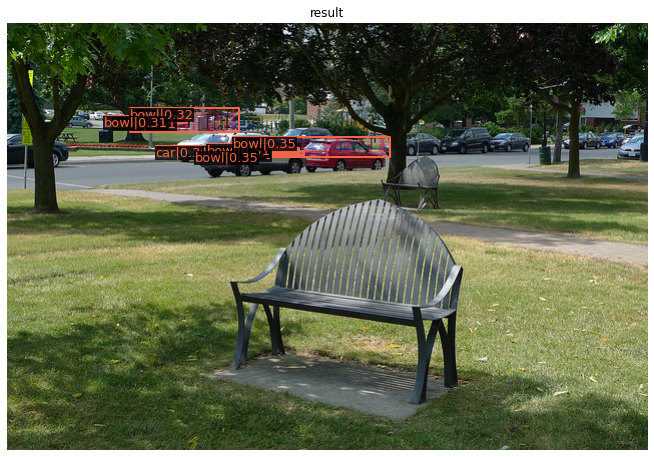

In [8]:
# Let's plot the result
show_result_pyplot(model, img, result, score_thr=0.3)

## Train a detector on customized dataset

To train a new detector, there are usually three things to do:
1. Support a new dataset
2. Modify the config
3. Train a new detector



### Support a new dataset

There are three ways to support a new dataset in MMDetection: 
  1. reorganize the dataset into COCO format.
  2. reorganize the dataset into a middle format.
  3. implement a new dataset.

Usually we recommend to use the first two methods which are usually easier than the third.

In this tutorial, we gives an example that converting the data into the format of existing datasets like COCO, VOC, etc. Other methods and more advanced usages can be found in the [doc](https://mmdetection.readthedocs.io/en/latest/tutorials/new_dataset.html#).

Firstly, let's download a tiny dataset obtained from [KITTI](http://www.cvlibs.net/datasets/kitti/eval_object.php?obj_benchmark=3d). We select the first 75 images and their annotations from the 3D object detection dataset (it is the same dataset as the 2D object detection dataset but has 3D annotations). We convert the original images from PNG to JPEG format with 80% quality to reduce the size of dataset.

In [9]:
# download, decompress the data
!wget https://open-mmlab.s3.ap-northeast-2.amazonaws.com/mmdetection/data/kitti_tiny.zip
!unzip kitti_tiny.zip > /dev/null
!unzip /content/drive/MyDrive/manually_test.zip > /dev/null

--2021-06-21 09:18:00--  https://open-mmlab.s3.ap-northeast-2.amazonaws.com/mmdetection/data/kitti_tiny.zip
Resolving open-mmlab.s3.ap-northeast-2.amazonaws.com (open-mmlab.s3.ap-northeast-2.amazonaws.com)... 52.219.146.27
Connecting to open-mmlab.s3.ap-northeast-2.amazonaws.com (open-mmlab.s3.ap-northeast-2.amazonaws.com)|52.219.146.27|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6918271 (6.6M) [application/zip]
Saving to: ‘kitti_tiny.zip’

kitti_tiny.zip      100%[===================>]   6.60M  4.31MB/s    in 1.5s    

2021-06-21 09:18:02 (4.31 MB/s) - ‘kitti_tiny.zip’ saved [6918271/6918271]



In [10]:
# Check the directory structure of the tiny data

# Install tree first
!apt-get -q install tree
!tree kitti_tiny

# !apt-get -q install tree
# !tree manually_test

Reading package lists...
Building dependency tree...
Reading state information...
tree is already the newest version (1.7.0-5).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
kitti_tiny
├── training
│   ├── image_2
│   │   ├── 000000.jpeg
│   │   ├── 000001.jpeg
│   │   ├── 000002.jpeg
│   │   ├── 000003.jpeg
│   │   ├── 000004.jpeg
│   │   ├── 000005.jpeg
│   │   ├── 000006.jpeg
│   │   ├── 000007.jpeg
│   │   ├── 000008.jpeg
│   │   ├── 000009.jpeg
│   │   ├── 000010.jpeg
│   │   ├── 000011.jpeg
│   │   ├── 000012.jpeg
│   │   ├── 000013.jpeg
│   │   ├── 000014.jpeg
│   │   ├── 000015.jpeg
│   │   ├── 000016.jpeg
│   │   ├── 000017.jpeg
│   │   ├── 000018.jpeg
│   │   ├── 000019.jpeg
│   │   ├── 000020.jpeg
│   │   ├── 000021.jpeg
│   │   ├── 000022.jpeg
│   │   ├── 000023.jpeg
│   │   ├── 000024.jpeg
│   │   ├── 000025.jpeg
│   │   ├── 000026.jpeg
│   │   ├── 000027.jpeg
│   │   ├── 000028.jpeg
│   │   ├── 000029.jpeg
│   │   ├── 000030.jpeg
│   │   ├── 000031.jpeg


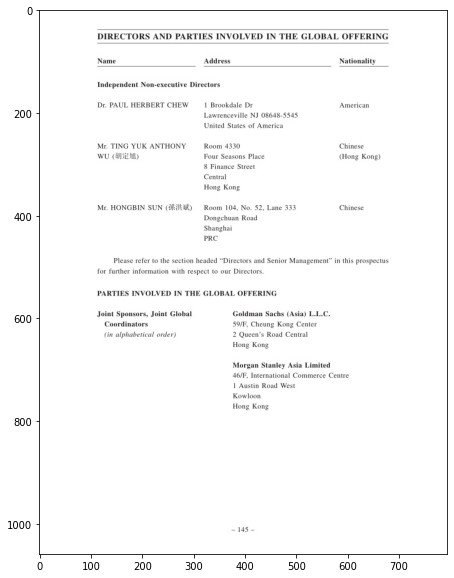

In [11]:
# Let's take a look at the dataset image
import mmcv
import matplotlib.pyplot as plt

# img = mmcv.imread('kitti_tiny/training/image_2/000073.jpeg')
img = mmcv.imread('manually_test/training/image_2/cTDaR_t10000.jpg')
plt.figure(figsize=(15, 10))
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

After downloading the data, we need to implement a function to convert the kitti annotation format into the middle format. In this tutorial we choose to convert them in **`load_annotations`** function in a newly implemented **`KittiTinyDataset`**.

Let's take a loot at the annotation txt file.



In [12]:
# Check the label of a single image
# !cat kitti_tiny/training/label_2/000000.txt
!cat manually_test/training/label_2/cTDaR_t10001.txt

column 0.00 0 0.0 495.00 201.00 623.00 273.00 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
column 0.00 0 0.0 624.00 200.00 751.00 272.00 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
columns 0.00 0 0.0 495.00 189.00 753.00 274.00 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
row 0.00 0 0.0 41.00 210.00 753.00 223.00 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
row 0.00 0 0.0 42.00 221.00 752.00 231.00 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
row 0.00 0 0.0 42.00 231.00 754.00 242.00 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
row 0.00 0 0.0 40.00 240.00 753.00 252.00 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
row 0.00 0 0.0 41.00 249.00 754.00 262.00 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
row 0.00 0 0.0 41.00 262.00 755.00 277.00 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
column 0.00 0 0.0 496.00 357.00 624.00 406.00 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
column 0.00 0 0.0 623.00 357.00 750.00 408.00 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
column 0.00 0 0.0 497.00 457.00 624.00 556.00 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
column 0.00 0 0.0 624.00 457.00 749.00 556.00 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
columns 0

According to the KITTI's documentation, the first column indicates the class of the object, and the 5th to 8th columns indicates the bboxes. We need to read annotations of each image and convert them into middle format MMDetection accept is as below:

```python
[
    {
        'filename': 'a.jpg',
        'width': 1280,
        'height': 720,
        'ann': {
            'bboxes': <np.ndarray> (n, 4),
            'labels': <np.ndarray> (n, ),
            'bboxes_ignore': <np.ndarray> (k, 4), (optional field)
            'labels_ignore': <np.ndarray> (k, 4) (optional field)
        }
    },
    ...
]
```

In [13]:
import copy
import os.path as osp

import mmcv
import numpy as np

from mmdet.datasets.builder import DATASETS
from mmdet.datasets.custom import CustomDataset

@DATASETS.register_module()
# class KittiTinyDataset(CustomDataset):
class man1Dataset(CustomDataset):
    CLASSES = ('column', 'row', 'colums','rows')
# 'Table','cell','borderless',
    def load_annotations(self, ann_file):
        cat2label = {k: i for i, k in enumerate(self.CLASSES)}
        # load image list from file
        image_list = mmcv.list_from_file(self.ann_file)
    
        data_infos = []
        # convert annotations to middle format
        for image_id in image_list:
            filename = f'{self.img_prefix}/{image_id}.jpg'
            image = mmcv.imread(filename)
            height, width = image.shape[:2]
    
            data_info = dict(filename=f'{image_id}.jpg', width=width, height=height)
    
            # load annotations
            label_prefix = self.img_prefix.replace('image_2', 'label_2')
            lines = mmcv.list_from_file(osp.join(label_prefix, f'{image_id}.txt'))
    
            content = [line.strip().split(' ') for line in lines]
            bbox_names = [x[0] for x in content]
            bboxes = [[float(info) for info in x[4:8]] for x in content]
    
            gt_bboxes = []
            gt_labels = []
            gt_bboxes_ignore = []
            gt_labels_ignore = []
    
            # filter 'DontCare'
            for bbox_name, bbox in zip(bbox_names, bboxes):
                if bbox_name in cat2label:
                    gt_labels.append(cat2label[bbox_name])
                    gt_bboxes.append(bbox)
                else:
                    gt_labels_ignore.append(-1)
                    gt_bboxes_ignore.append(bbox)

            data_anno = dict(
                bboxes=np.array(gt_bboxes, dtype=np.float32).reshape(-1, 4),
                labels=np.array(gt_labels, dtype=np.long),
                bboxes_ignore=np.array(gt_bboxes_ignore,
                                       dtype=np.float32).reshape(-1, 4),
                labels_ignore=np.array(gt_labels_ignore, dtype=np.long))

            data_info.update(ann=data_anno)
            data_infos.append(data_info)

        return data_infos

### Modify the config

In the next step, we need to modify the config for the training.
To accelerate the process, we finetune a detector using a pre-trained detector.

In [14]:
from mmcv import Config
cfg = Config.fromfile('./configs/faster_rcnn/faster_rcnn_r50_caffe_fpn_mstrain_1x_coco.py')

Given a config that trains a Faster R-CNN on COCO dataset, we need to modify some values to use it for training Faster R-CNN on KITTI dataset.

In [15]:
from mmdet.apis import set_random_seed

# Modify dataset type and path
cfg.dataset_type = 'man1Dataset'
cfg.data_root = 'manually_test/'

cfg.data.test.type = 'man1Dataset'
cfg.data.test.data_root = 'manually_test/'
cfg.data.test.ann_file = 'train.txt'
cfg.data.test.img_prefix = 'training/image_2'

cfg.data.train.type = 'man1Dataset'
cfg.data.train.data_root = 'manually_test/'
cfg.data.train.ann_file = 'train.txt'
cfg.data.train.img_prefix = 'training/image_2'

cfg.data.val.type = 'man1Dataset'
cfg.data.val.data_root = 'manually_test/'
cfg.data.val.ann_file = 'val.txt'
cfg.data.val.img_prefix = 'training/image_2'

# modify num classes of the model in box head
cfg.model.roi_head.bbox_head.num_classes = 4
# We can still use the pre-trained Mask RCNN model though we do not need to
# use the mask branch
cfg.load_from = 'checkpoints/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth'

cfg.work_dir = './tutorial_exps'
# cfg.resume_from = 'epoch_36.pth'

# The original learning rate (LR) is set for 8-GPU training.
# We divide it by 8 since we only use one GPU.
cfg.optimizer.lr = 0.02 / 8
cfg.lr_config.warmup = None
cfg.log_config.interval = 10

# Change the evaluation metric since we use customized dataset.
cfg.evaluation.metric = 'mAP'
# We can set the evaluation interval to reduce the evaluation times
cfg.evaluation.interval = 12
# We can set the checkpoint saving interval to reduce the storage cost
cfg.checkpoint_config.interval = 12

# Set seed thus the results are more reproducible
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpu_ids = range(1)


# We can initialize the logger for training and have a look
# at the final config used for training
print(f'Config:\n{cfg.pretty_text}')


Config:
model = dict(
    type='FasterRCNN',
    pretrained='open-mmlab://detectron2/resnet50_caffe',
    backbone=dict(
        type='ResNet',
        depth=50,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        frozen_stages=1,
        norm_cfg=dict(type='BN', requires_grad=False),
        norm_eval=True,
        style='caffe'),
    neck=dict(
        type='FPN',
        in_channels=[256, 512, 1024, 2048],
        out_channels=256,
        num_outs=5),
    rpn_head=dict(
        type='RPNHead',
        in_channels=256,
        feat_channels=256,
        anchor_generator=dict(
            type='AnchorGenerator',
            scales=[8],
            ratios=[0.5, 1.0, 2.0],
            strides=[4, 8, 16, 32, 64]),
        bbox_coder=dict(
            type='DeltaXYWHBBoxCoder',
            target_means=[0.0, 0.0, 0.0, 0.0],
            target_stds=[1.0, 1.0, 1.0, 1.0]),
        loss_cls=dict(
            type='CrossEntropyLoss', use_sigmoid=True, loss_weight=1.0),
        los

### Train a new detector

Finally, lets initialize the dataset and detector, then train a new detector!

In [16]:
from mmdet.datasets import build_dataset
from mmdet.models import build_detector
from mmdet.apis import train_detector


# Build dataset
datasets = [build_dataset(cfg.data.train)]

# Build the detector
model = build_detector( cfg.model, train_cfg=cfg.get('train_cfg'), test_cfg=cfg.get('test_cfg'))
# Add an attribute for visualization convenience
model.CLASSES = datasets[0].CLASSES

# Create work_dir
mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))
train_detector(model, datasets, cfg, distributed=False, validate=True)

/content/drive/My Drive/mmdetection/mmdet/datasets/custom.py:156: UserWarning: CustomDataset does not support filtering empty gt images.
  'CustomDataset does not support filtering empty gt images.')
/content/drive/My Drive/mmdetection/mmdet/models/detectors/two_stage.py:28: UserWarning: DeprecationWarning: pretrained is deprecated, please use "init_cfg" instead
  warnings.warn('DeprecationWarning: pretrained is deprecated, '
/content/drive/My Drive/mmdetection/mmdet/models/backbones/resnet.py:400: UserWarning: DeprecationWarning: pretrained is deprecated, please use "init_cfg" instead
  warnings.warn('DeprecationWarning: pretrained is deprecated, '
2021-06-21 09:18:10,753 - mmdet - INFO - load checkpoint from checkpoints/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth
2021-06-21 09:18:10,759 - mmdet - INFO - Use load_from_local loader
2021-06-21 09:18:11,077 - mmdet - WARNING - The model and loaded state dict do not match exactly

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 12/12, 13.7 task/s, elapsed: 1s, ETA:     0s
---------------iou_thr: 0.5---------------


2021-06-21 09:18:54,836 - mmdet - INFO - 
+--------+-----+------+--------+-------+
| class  | gts | dets | recall | ap    |
+--------+-----+------+--------+-------+
| column | 83  | 366  | 1.000  | 0.992 |
| row    | 162 | 264  | 0.012  | 0.000 |
| colums | 0   | 1    | 0.000  | 0.000 |
| rows   | 0   | 1    | 0.000  | 0.000 |
+--------+-----+------+--------+-------+
| mAP    |     |      |        | 0.496 |
+--------+-----+------+--------+-------+
2021-06-21 09:18:54,839 - mmdet - INFO - Saving checkpoint at 12 epochs
2021-06-21 09:18:56,059 - mmdet - INFO - Epoch(val) [12][12]	AP50: 0.4960, mAP: 0.4964


### Understand the log
From the log, we can have a basic understanding the training process and know how well the detector is trained.

Firstly, the ResNet-50 backbone pre-trained on ImageNet is loaded, this is a common practice since training from scratch is more cost. The log shows that all the weights of the ResNet-50 backbone are loaded except the `conv1.bias`, which has been merged into `conv.weights`.

Second, since the dataset we are using is small, we loaded a Mask R-CNN model and finetune it for detection. Because the detector we actually using is Faster R-CNN, the weights in mask branch, e.g. `roi_head.mask_head`, are `unexpected key in source state_dict` and not loaded.
The original Mask R-CNN is trained on COCO dataset which contains 80 classes but KITTI Tiny dataset only have 3 classes. Therefore, the last FC layer of the pre-trained Mask R-CNN for classification has different weight shape and is not used.

Third, after training, the detector is evaluated by the default VOC-style evaluation. The results show that the detector achieves 54.1 mAP on the val dataset,
 not bad!

## Test the trained detector

After finetuning the detector, let's visualize the prediction results!

/content/drive/My Drive/mmdetection/mmdet/datasets/utils.py:68: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)


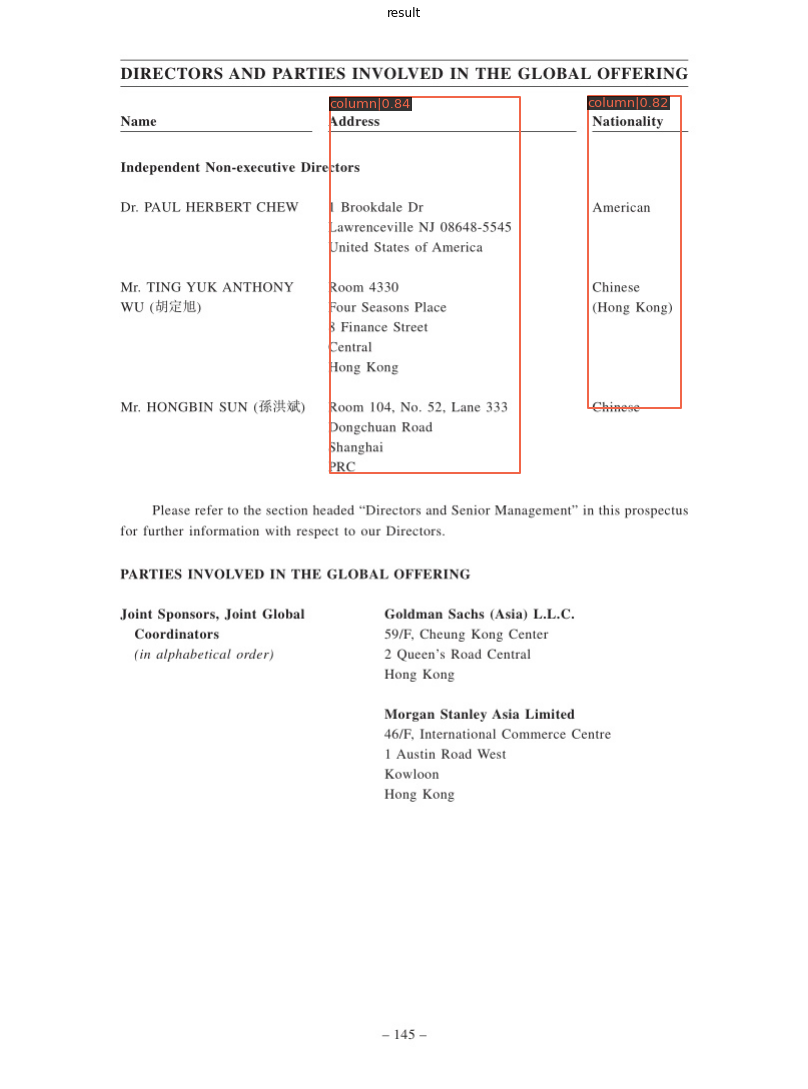

In [17]:
img = mmcv.imread('manually_test/training/image_2/cTDaR_t10000.jpg')

model.cfg = cfg
result = inference_detector(model, img)
show_result_pyplot(model, img, result, score_thr=0.8)

# torch.save(model.state_dict(), '/content/drive/MyDrive/mmdetection/epoch_35.pth')

